In [1]:
!pip install networkx

In [2]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing pymnet.egg-info\PKG-INFO
writing dependency_links to pymnet.egg-info\dependency_links.txt
writing top-level names to pymnet.egg-info\top_level.txt
reading manifest file 'pymnet.egg-info\SOURCES.txt'
writing manifest file 'pymnet.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\pymnet
copying build\lib\pymnet\cc.py -> build\bdist.win-amd64\egg\pymnet
copying build\lib\pymnet\diagnostics.py -> build\bdist.win-amd64\egg\pymnet
creating build\bdist.win-amd64\egg\pymnet\graphlets
copying build\lib\pymnet\graphlets\graphlets.py -> build\bdist.win-amd64\egg\pymnet\graphlets
copying build\lib\pymnet\graphlets\graphlet_measures.py -> build\bdist.win-amd64\egg\pymnet\graphlets
copying build\lib\pymnet\graphlets\independent_equations.py -> build\bdist.win-amd64\egg\pymnet\graphlets
copying build\lib\pymnet\g

zip_safe flag not set; analyzing archive contents...
pymnet.tests.__pycache__.visuals_test.cpython-37: module references __file__
pymnet.visuals.drawbackends.__pycache__.threejs.cpython-37: module references __file__


In [3]:
import pandas as pd
import numpy as np
import branca.colormap as cmm
import math
from sklearn.metrics.pairwise import haversine_distances
from sklearn.mixture import GaussianMixture   #Gaussian Mixture Model
from sklearn.cluster import KMeans #Weighted K-Means Clustering
import matplotlib.pyplot as mtp
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from pymnet import *

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [4]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'autobahnschicht.pdf',
 'autobahnschicht2.pdf',
 'build',
 'circle_map.html',
 "Dataframe'e Yeni Column Ekleme.ipynb",
 'density_colormap.html',
 'density_data_morning_clustered_filtered.html',
 'density_data_morning_colormap.html',
 'density_morning_colormap.html',
 'dist',
 'Distance_curve.png',
 'First.ipynb',
 'fullnetwork.pdf',
 'karayolulayer.pdf',
 'Map.html',
 'mnet.pdf',
 'Multilayer-networks-library-master',
 'mygraph.png',
 'net.pdf',
 'pymnet',
 'pymnet.egg-info',
 'seewegnetz.html',
 'seewegschicht.pdf',
 'seewegschicht2.pdf',
 'setup.py',
 'Subway_Stations.geojson',
 'Traffic_in_Istanbul.ipynb',
 'trafikdensity.csv',
 'trafikdensity.zip',
 '__pycache__']

In [5]:
ellips = [132868.43333333326,
 277000.6666666668,
 107798.41666666669,
 23242.18333333334,
 33461.533333333326,
 61489.11666666664,
 42907.70000000002,
 63354.44999999998,
 17466.866666666672,
 13593.499999999998,
 22127.866666666665,
 23087.966666666667,
 10006.55,
 9911.533333333336,
 3451.2,
 10121.249999999998,
 20659.716666666667,
 9306.516666666666,
 57320.3,
 79793.03333333333,
 24630.41666666668,
 7017.5666666666675,
 8116.200000000001,
 6896.883333333333,
 10609.166666666666,
 16220.966666666662,
 4495.033333333332,
 7185.449999999999,
 885178.1500000019,
 230127.7500000002,
 274904.38333333354,
 279859.4000000001]

In [6]:
autobahnsumme = 0
for i in range(len(ellips)):
    autobahnsumme += ellips[i]

autobahnsumme

2774210.1666666693

In [7]:
autobahnsummenew = autobahnsumme * 80 / 100

In [516]:
seewegsumme = 0
seewegsumme = ellips[11]+ellips[30]+ellips[9]+ellips[22]+ellips[23]

In [517]:
seewegsumme

326598.9333333336

In [518]:
seewegprozent=seewegsumme*80/100
seewegprozent

261279.14666666687

In [554]:
#KONFİGÜRASYON SONUÇLARI
konfiguration_seeweg = np.array([137320.719, 483156.45, 194977, 132868.43, 265779.74, 92731.69, 132868.43, 135215.49, 42331.4,
                                1027540.25, 242357.89, 13938.17, 261279.14])

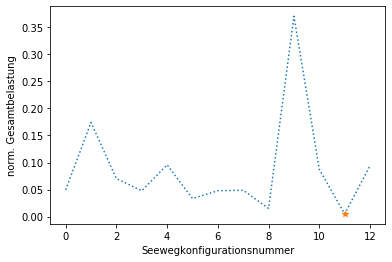

In [565]:
plt.plot(konfiguration_seeweg/autobahnsumme, linestyle = 'dotted')
plt.plot(11,0.005024193973287647, marker = '*')
plt.xlabel("Seewegkonfigurationsnummer")
plt.ylabel("norm. Gesamtbelastung")
plt.show()

In [952]:
konfiguration_seeweg = konfiguration_seeweg/autobahnsumme

In [953]:
len(konfiguration_seeweg)

13

In [954]:
konfiguration_variance = []
for i in range(len(konfiguration_seeweg)):
    variance = np.var(konfiguration_seeweg[0:(i+1)])
    konfiguration_variance.append(variance)

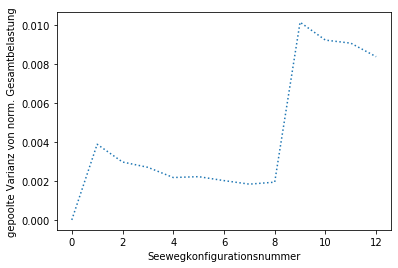

In [955]:
plt.plot(konfiguration_variance, linestyle = 'dotted')
plt.xlabel("Seewegkonfigurationsnummer")
plt.ylabel("gepoolte Varianz von norm. Gesamtbelastung")
plt.show()

In [81]:
mpnet = MultiplexNetwork(couplings="none")
mpnet.add_node(0) #Büyükçekmece
mpnet.add_node(1) #Avcılar
mpnet.add_node(2) #Bakırköy
mpnet.add_node(3) #Yenikapı
mpnet.add_node(4) #Fener
mpnet.add_node(5) #Karaköy
mpnet.add_node(6) #Kasımpaşa
mpnet.add_node(7) #Ortaköy
mpnet.add_node(8) #Kadıköy
mpnet.add_node(9) #Beylerbeyi
mpnet.add_node(10) #Arnavutköy
mpnet.add_node(11) #Emirgan
mpnet.add_node(12) #Yeniköy
mpnet.add_node(13) #Büyükdere
mpnet.add_node(14) #Rumelikavağı
mpnet.add_node(15) #Beykoz
mpnet.add_node(16) #Çubuklu
mpnet.add_node(17)
mpnet.add_node(18)
mpnet.add_node(19)
mpnet.add_node(20)
mpnet.add_node(21)
mpnet.add_node(22)
mpnet.add_node(23)
mpnet.add_node(24)
mpnet.add_node(25)
mpnet.add_node(26)
mpnet.add_node(27)
mpnet.add_node(28)
mpnet.add_node(29)
mpnet.add_node(30)
mpnet.add_node(31) #Beykoz
mpnet.add_node(32) #Anadolu Kavağı

In [82]:
mpnet.add_layer('Autobahn')

In [83]:
mpnet.A['Autobahn'][0,1] = 1
mpnet.A['Autobahn'][1,2] = 1
mpnet.A['Autobahn'][1,20] = 1
mpnet.A['Autobahn'][2,3] = 1
mpnet.A['Autobahn'][3,4] = 1
mpnet.A['Autobahn'][3,5] = 1
mpnet.A['Autobahn'][4,20] = 1
mpnet.A['Autobahn'][5,24] = 1
mpnet.A['Autobahn'][6,7] = 1
mpnet.A['Autobahn'][6,11] = 1
mpnet.A['Autobahn'][7,9] = 1
mpnet.A['Autobahn'][7,24] = 1
mpnet.A['Autobahn'][7,10] = 1
mpnet.A['Autobahn'][8,9] = 1
mpnet.A['Autobahn'][9,21] = 1
mpnet.A['Autobahn'][12,11] = 1
mpnet.A['Autobahn'][13,14] = 1
mpnet.A['Autobahn'][15,16] = 1
mpnet.A['Autobahn'][16,17] = 1
mpnet.A['Autobahn'][18,19] = 1
mpnet.A['Autobahn'][21,25] = 1
mpnet.A['Autobahn'][21,26] = 1
mpnet.A['Autobahn'][22,23] = 1
mpnet.A['Autobahn'][26,28] = 1
mpnet.A['Autobahn'][27,25] = 1
mpnet.A['Autobahn'][28,29] = 1
mpnet.A['Autobahn'][29,30] = 1

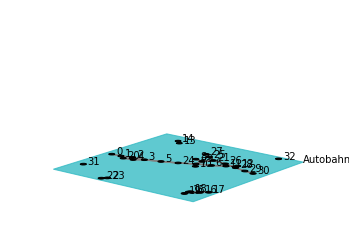

In [950]:
fig2 = draw(mpnet,layergap=2.0,camera_dist=10,alignedNodes='true')

In [951]:
fig2.savefig("autobahnschicht2.pdf")

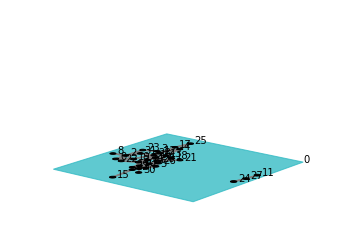

In [413]:
#En düşük costlu grafik
net2 = models.er_multilayer(33,1,0.1)
fig3 = draw(net2)

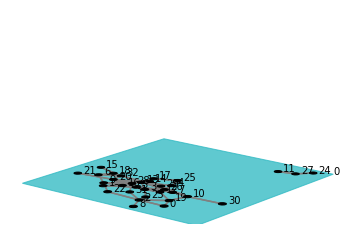

In [944]:
fig3 = draw(net2,camera_dist=8)

In [945]:
fig3.savefig("seewegschicht2.pdf")

In [415]:
randomlist3 = []
for i in range(len(net2)): #32
    a = list(net2[i,0])
    for j in range(len(a)):
        c = a[j][0] #2
        b = list(mpnet[c,'Autobahn'])
        for k in range(len(b)):
            d = b[k][0] #3
            if c==d or i==d:
                randomlist3.append(a)

In [416]:
randomlist3

[[(5, 0), (10, 0), (26, 0), (29, 0)],
 [(7, 0), (19, 0), (26, 0), (29, 0), (30, 0)],
 [(3, 0), (4, 0), (14, 0), (18, 0), (20, 0), (26, 0)],
 [(13, 0), (28, 0), (29, 0)]]

In [452]:
list(net2[13,0])

[(3, 0), (4, 0), (14, 0), (18, 0), (20, 0), (26, 0)]

In [453]:
list(mpnet[13,'Autobahn'])

[(14, 'Autobahn')]

In [108]:
seewegsumme2 = ellips[9]+ellips[29]

In [109]:
seewegsummeprozent2 = seewegsumme2*80/100

In [110]:
seewegsummeprozent2

194977.00000000015

In [457]:
mnet = MultiplexNetwork(couplings="none")
mnet.add_node(0) #Büyükçekmece
mnet.add_node(1) #Avcılar
mnet.add_node(2) #Bakırköy
mnet.add_node(3) #Yenikapı
mnet.add_node(4) #Fener
mnet.add_node(5) #Karaköy
mnet.add_node(6) #Kasımpaşa
mnet.add_node(7) #Ortaköy
mnet.add_node(8) #Kadıköy
mnet.add_node(9) #Beylerbeyi
mnet.add_node(10) #Arnavutköy
mnet.add_node(11) #Emirgan
mnet.add_node(12) #Yeniköy
mnet.add_node(13) #Büyükdere
mnet.add_node(14) #Rumelikavağı
mnet.add_node(15) #Beykoz
mnet.add_node(16) #Çubuklu
mnet.add_node(17)
mnet.add_node(18)
mnet.add_node(19)
mnet.add_node(20)
mnet.add_node(21)
mnet.add_node(22)
mnet.add_node(23)
mnet.add_node(24)
mnet.add_node(25)
mnet.add_node(26)
mnet.add_node(27)
mnet.add_node(28)
mnet.add_node(29)
mnet.add_node(30)
mnet.add_node(31) #Beykoz
mnet.add_node(32) #Anadolu Kavağı

In [458]:
mnet.add_layer('Autobahn')

In [459]:
mnet.A['Autobahn'][0,1] = 1
mnet.A['Autobahn'][1,2] = 1
mnet.A['Autobahn'][1,20] = 1
mnet.A['Autobahn'][2,3] = 1
mnet.A['Autobahn'][3,4] = 1
mnet.A['Autobahn'][3,5] = 1
mnet.A['Autobahn'][4,20] = 1
mnet.A['Autobahn'][5,24] = 1
mnet.A['Autobahn'][6,7] = 1
mnet.A['Autobahn'][6,11] = 1
mnet.A['Autobahn'][7,9] = 1
mnet.A['Autobahn'][7,24] = 1
mnet.A['Autobahn'][7,10] = 1
mnet.A['Autobahn'][8,9] = 1
mnet.A['Autobahn'][9,21] = 1
mnet.A['Autobahn'][12,11] = 1
mnet.A['Autobahn'][13,14] = 1
mnet.A['Autobahn'][15,16] = 1
mnet.A['Autobahn'][16,17] = 1
mnet.A['Autobahn'][18,19] = 1
mnet.A['Autobahn'][21,25] = 1
mnet.A['Autobahn'][21,26] = 1
mnet.A['Autobahn'][22,23] = 1
mnet.A['Autobahn'][26,28] = 1
mnet.A['Autobahn'][27,25] = 1
mnet.A['Autobahn'][28,29] = 1
mnet.A['Autobahn'][29,30] = 1

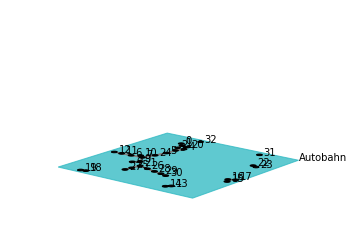

In [460]:
fig = draw(mnet,layergap=2.0,camera_dist=10.4,alignedNodes='true')

In [9]:
fig.savefig("autobahnschicht.pdf")

In [194]:
#Farklı ağırlıklarla yapmak istersen böyle yapılıyor.
#mnet.A['a'][4,2] = 50

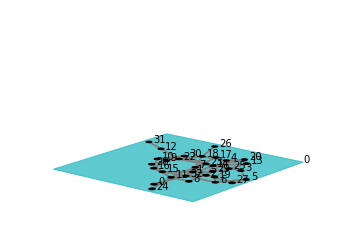

In [465]:
net = models.er_multilayer(33,1,0.1)
fig2 = draw(net)

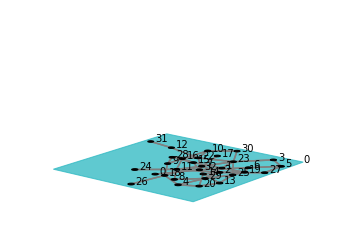

In [936]:
fig2 = draw(net)

In [466]:
fig2.savefig("seewegschicht.pdf")

In [467]:
randomlist2 = []
for i in range(len(net)): #32
    a = list(net[i,0])
    for j in range(len(a)):
        c = a[j][0] #2
        b = list(mnet[c,'Autobahn'])
        for k in range(len(b)):
            d = b[k][0] #3
            if c==d or i==d:
                randomlist2.append(a)

In [468]:
randomlist2

[[(5, 0), (23, 0)],
 [(18, 0), (20, 0), (29, 0)],
 [(3, 0), (6, 0), (27, 0)],
 [(14, 0), (20, 0), (25, 0)],
 [(2, 0), (13, 0), (20, 0), (22, 0), (32, 0)],
 [(1, 0), (16, 0), (28, 0), (32, 0)],
 [(9, 0), (10, 0), (11, 0), (15, 0)],
 [(4, 0), (13, 0), (14, 0)],
 [(10, 0), (12, 0), (14, 0), (23, 0), (28, 0)],
 [(1, 0), (3, 0), (7, 0), (22, 0), (25, 0), (30, 0)]]

In [515]:
list(net[30,0])

[(10, 0), (23, 0)]

In [514]:
list(mnet[30,'Autobahn'])

[(29, 'Autobahn')]

In [17]:
!pip install scikit-network

  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'c:\\users\\asus\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [21]:
import sknetwork as skn

ModuleNotFoundError: No module named 'sknetwork'

In [18]:
from IPython.display import SVG
import numpy as np
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

ModuleNotFoundError: No module named 'sknetwork'

In [ ]:
graph = net
adjacency = graph.adjacency
position = graph.position
labels = graph.labels

In [ ]:
image = svg_graph(adjacency, position, labels=labels, scale=3, node_size=3)
SVG(image)

In [12]:
#ÇALIŞTIRMA
import random
randomlist = []
for i in range(0,81):  #burdaki sayının 1 eksiğinin yarısı kadar bağ oluşuyor
    n = random.randint(0,32)
    randomlist.append(n)
print(randomlist)

[27, 11, 25, 27, 11, 26, 30, 29, 9, 19, 0, 26, 3, 24, 21, 15, 22, 9, 5, 13, 13, 15, 24, 1, 11, 12, 21, 10, 9, 0, 19, 20, 4, 7, 31, 22, 5, 4, 1, 8, 9, 0, 5, 7, 3, 22, 4, 7, 26, 13, 31, 28, 16, 1, 8, 10, 15, 31, 18, 15, 22, 30, 3, 20, 2, 5, 28, 1, 15, 23, 28, 31, 16, 0, 8, 30, 31, 11, 21, 1, 7]


In [13]:
for i in range(0,42,2): #randomlist boyutunda olmalı ortadaki sayı. for'un 1 eksiği
    mnet.A['Seeweg'][randomlist[i],randomlist[i+1]] = 1

KeyError: 'Seeweg'

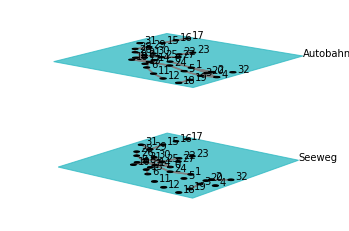

In [431]:
fig = draw(mnet,layergap=2.0,camera_dist=10.4,alignedNodes='true')

In [429]:
list(mnet[6,'Seeweg'])

[(13, 'Seeweg')]

In [430]:
list(mnet[6,'Autobahn'])

[(7, 'Autobahn'), (11, 'Autobahn')]

In [432]:
fig.savefig("fullnetwork.pdf")

In [83]:
data = pd.read_csv('trafikdensity.csv',parse_dates=True,index_col=0)

In [84]:
data

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
_id,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
4,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88
7,2020-01-24 16:00:00,28.712769,40.992737,sxk3jq,6,91,49,299
8,2020-01-27 13:00:00,28.899536,41.069641,sxk99s,6,46,15,167
9,2020-01-06 20:00:00,28.822632,40.998230,sxk3pz,6,114,59,287


In [85]:
#converted to datetime object
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], yearfirst=True) 

In [86]:
#Ocak ayının tüm günleri için saat 07:00 ile 21:00 arasındaki veriyi aldık
data = data[data['DATE_TIME'].dt.strftime('%H:%M:%S').between('07:00:00','21:00:00')]

In [87]:
data

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
_id,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88
7,2020-01-24 16:00:00,28.712769,40.992737,sxk3jq,6,91,49,299
8,2020-01-27 13:00:00,28.899536,41.069641,sxk99s,6,46,15,167
9,2020-01-06 20:00:00,28.822632,40.998230,sxk3pz,6,114,59,287
10,2020-01-24 17:00:00,28.976440,41.097107,sxk9g3,6,77,33,277


In [88]:
# Creating hour column according to hour of DATE_TIME 
data['hour']=data['DATE_TIME'].apply(lambda x: x.hour)
data.head()

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour
_id,,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105,13
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68,7
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11,20
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123,20
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88,10


In [89]:
#Creating weekday in a column
data['weekday'] = data['DATE_TIME'].apply(lambda x: x.weekday())

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [90]:
data.head()

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105,13,4
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68,7,3
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11,20,4
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123,20,4
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88,10,0


In [91]:
# Filter data for weekdays
data_weekdays = data.loc[(data['DATE_TIME'].dt.weekday != 5) & (data['DATE_TIME'].dt.weekday != 6)]

In [92]:
len(data_weekdays)

678639

In [93]:
#Saat 7 ile 11 arası (11 dahil değil)
data_morning = data_weekdays.loc[(data_weekdays['DATE_TIME'].dt.hour < 11)]
data_morning

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68,7,3
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88,10,0
16,2020-01-16 07:00:00,28.075562,41.075134,sx7cwv,55,129,85,46,7,3
17,2020-01-21 08:00:00,29.020386,41.058655,sxk9s6,6,110,60,231,8,1
35,2020-01-30 10:00:00,28.405151,41.047668,sxk1w2,52,140,74,61,10,3
36,2020-01-01 10:00:00,29.338989,40.981750,sxkc5s,51,106,77,14,10,2
38,2020-01-13 07:00:00,28.800659,41.141052,sxk6p3,15,146,73,135,7,0
40,2020-01-29 10:00:00,28.580933,41.102600,sxk3f6,25,132,83,78,10,2
52,2020-01-28 09:00:00,29.415894,40.783997,sxkbj2,10,101,50,142,9,1


In [94]:
#Öğle 11 ile 15 arası (15 dahil değil)
data_midday = data_weekdays.loc[(data_weekdays['DATE_TIME'].dt.hour < 15) & (data_weekdays['DATE_TIME'].dt.hour >= 11)]
data_midday

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105,13,4
8,2020-01-27 13:00:00,28.899536,41.069641,sxk99s,6,46,15,167,13,0
31,2020-01-17 12:00:00,28.866577,41.014709,sxk92f,6,46,15,81,12,4
32,2020-01-23 11:00:00,29.053345,41.020203,sxk9m5,6,91,34,201,11,3
39,2020-01-08 11:00:00,28.504028,41.124573,sxk3bw,49,146,77,20,11,2
51,2020-01-13 13:00:00,29.031372,41.058655,sxk9sd,6,57,28,40,13,0
62,2020-01-17 14:00:00,28.965454,41.069641,sxk9eh,6,70,33,86,14,4
85,2020-01-03 11:00:00,28.174438,41.119080,sxk1cj,64,128,89,65,11,4
91,2020-01-01 12:00:00,28.657837,41.009216,sxk3k1,31,116,69,135,12,2


In [95]:
#Öğleden sonra 15 ile 18 arası (18 dahil değil)
data_afternoon = data_weekdays.loc[(data_weekdays['DATE_TIME'].dt.hour < 18) & (data_weekdays['DATE_TIME'].dt.hour >= 15)]
data_afternoon

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
7,2020-01-24 16:00:00,28.712769,40.992737,sxk3jq,6,91,49,299,16,4
10,2020-01-24 17:00:00,28.976440,41.097107,sxk9g3,6,77,33,277,17,4
14,2020-01-09 15:00:00,28.822632,41.206970,sxk6rv,36,132,78,114,15,3
19,2020-01-21 17:00:00,28.789673,41.047668,sxk3x0,9,98,44,108,17,1
28,2020-01-22 15:00:00,28.624878,40.998230,sxk35r,7,68,34,41,15,2
42,2020-01-20 15:00:00,29.317017,41.075134,sxkcej,30,94,58,14,15,0
44,2020-01-31 15:00:00,28.383179,41.069641,sxk1tu,48,144,85,125,15,4
45,2020-01-21 17:00:00,29.163208,40.992737,sxk9pw,6,112,29,540,17,1
66,2020-01-17 16:00:00,29.382935,40.932312,sxkbue,58,154,97,22,16,4


In [96]:
#Akşam 18 ile 21 arası (21 dahil)
data_evening = data_weekdays.loc[(data_weekdays['DATE_TIME'].dt.hour <= 21) & (data_weekdays['DATE_TIME'].dt.hour >= 18)]
data_evening

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11,20,4
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123,20,4
9,2020-01-06 20:00:00,28.822632,40.998230,sxk3pz,6,114,59,287,20,0
11,2020-01-08 20:00:00,29.141235,40.965271,sxk9p1,23,75,56,32,20,2
12,2020-01-09 21:00:00,29.328003,40.937805,sxkbgk,6,150,68,424,21,3
21,2020-01-24 19:00:00,28.811646,41.174011,sxk6px,56,145,94,132,19,4
25,2020-01-20 21:00:00,28.009644,41.289368,sx7fvk,31,102,65,17,21,0
34,2020-01-10 18:00:00,29.295044,40.904846,sxkbdw,23,64,41,19,18,4
47,2020-01-29 20:00:00,29.097290,40.981750,sxk9nh,6,114,34,574,20,2


In [97]:
# Enlem, boylam, haftaiçi ve saatlere göre gruplandı diğer sütunların ortalaması alındı.
data_morning = data_morning.groupby(['LONGITUDE','LATITUDE','weekday','hour']).mean().reset_index()
data_midday = data_midday.groupby(['LONGITUDE','LATITUDE','weekday','hour']).mean().reset_index()
data_afternoon = data_afternoon.groupby(['LONGITUDE','LATITUDE','weekday','hour']).mean().reset_index()
data_evening = data_evening.groupby(['LONGITUDE','LATITUDE','weekday','hour']).mean().reset_index()

#Örnek olarak data_morning bastırıldı
data_morning

,LONGITUDE,LATITUDE,weekday,hour,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,27.965698,40.981750,0,7,68.000000,147.000000,93.000000,12.000000
1,27.965698,40.981750,0,8,66.500000,122.500000,87.000000,12.500000
2,27.965698,40.981750,0,9,62.000000,120.333333,89.666667,15.666667
3,27.965698,40.981750,0,10,56.000000,114.666667,83.333333,15.000000
4,27.965698,40.981750,1,7,61.000000,116.000000,89.500000,12.500000
5,27.965698,40.981750,1,8,61.000000,119.000000,84.666667,16.000000
6,27.965698,40.981750,1,9,63.500000,125.750000,90.750000,15.000000
7,27.965698,40.981750,1,10,65.250000,119.250000,83.750000,14.500000
8,27.965698,40.981750,2,7,65.000000,117.000000,88.000000,11.000000
9,27.965698,40.981750,2,8,61.500000,117.000000,84.000000,13.000000


In [98]:
#Sadece long,lat,number of vehicles sütunları kalsın diye bu kod çalıştırılır.
data_morning = data_morning.drop(columns=['weekday','hour','MINIMUM_SPEED','MAXIMUM_SPEED','AVERAGE_SPEED'])
data_midday = data_midday.drop(columns=['weekday','hour','MINIMUM_SPEED','MAXIMUM_SPEED','AVERAGE_SPEED'])
data_afternoon = data_afternoon.drop(columns=['weekday','hour','MINIMUM_SPEED','MAXIMUM_SPEED','AVERAGE_SPEED'])
data_evening = data_evening.drop(columns=['weekday','hour','MINIMUM_SPEED','MAXIMUM_SPEED','AVERAGE_SPEED'])

In [99]:
data_morning

,LONGITUDE,LATITUDE,NUMBER_OF_VEHICLES
0,27.965698,40.981750,12.000000
1,27.965698,40.981750,12.500000
2,27.965698,40.981750,15.666667
3,27.965698,40.981750,15.000000
4,27.965698,40.981750,12.500000
5,27.965698,40.981750,16.000000
6,27.965698,40.981750,15.000000
7,27.965698,40.981750,14.500000
8,27.965698,40.981750,11.000000
9,27.965698,40.981750,13.000000


In [100]:
data_morning = data_morning.sort_values(by=['NUMBER_OF_VEHICLES'])

In [101]:
data_morning = data_morning.sort_values(by=['LONGITUDE'])

In [102]:
data_morning

,LONGITUDE,LATITUDE,NUMBER_OF_VEHICLES
81,27.965698,41.333313,12.000000
49,27.965698,41.097107,24.750000
36,27.965698,40.987244,16.000000
63,27.965698,41.212463,27.500000
56,27.965698,41.097107,22.750000
105,27.965698,41.338806,18.000000
61,27.965698,41.212463,24.750000
76,27.965698,41.212463,24.750000
93,27.965698,41.333313,13.500000
89,27.965698,41.333313,18.000000


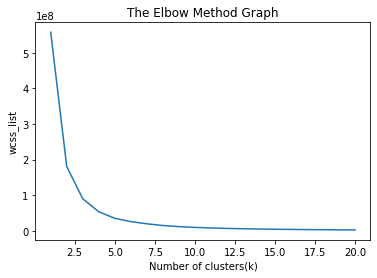

In [288]:
#WEIGHTED K-MEANS

#finding optimal number of clusters using the elbow method  
 
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 20.  
for i in range(1, 21):  
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)  
    kmeans.fit(data_midday)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 21), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

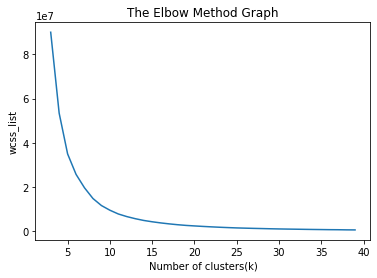

In [225]:
#finding optimal number of clusters using the elbow method  
 
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 6 to 20.  
for i in range(3, 40):  
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)  
    kmeans.fit(data_midday)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(3, 40), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

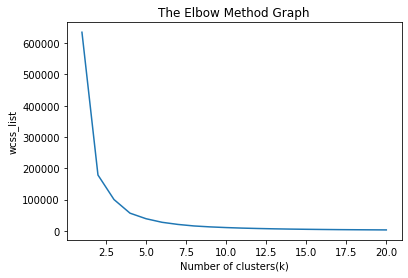

In [26]:
#WEIGHTED K-MEANS

#finding optimal number of clusters using the elbow method  
 
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 20.  
for i in range(1, 21):  
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)  
    kmeans.fit(data_afternoon)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 21), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

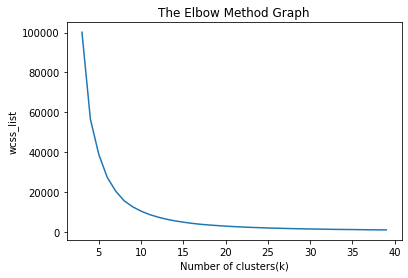

In [27]:
#finding optimal number of clusters using the elbow method  
 
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 6 to 20.  
for i in range(3, 40):  
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)  
    kmeans.fit(data_afternoon)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(3, 40), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

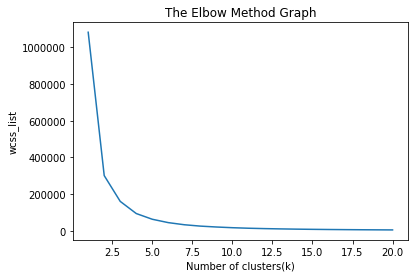

In [28]:
#WEIGHTED K-MEANS

#finding optimal number of clusters using the elbow method  
 
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 20.  
for i in range(1, 21):  
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)  
    kmeans.fit(data_evening)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 21), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

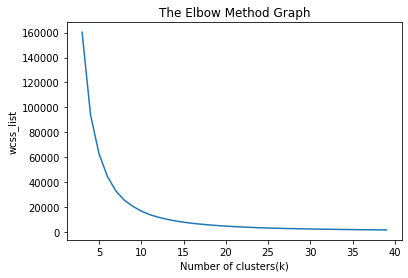

In [29]:
#finding optimal number of clusters using the elbow method  
 
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 6 to 20.  
for i in range(3, 40):  
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)  
    kmeans.fit(data_evening)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(3, 40), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

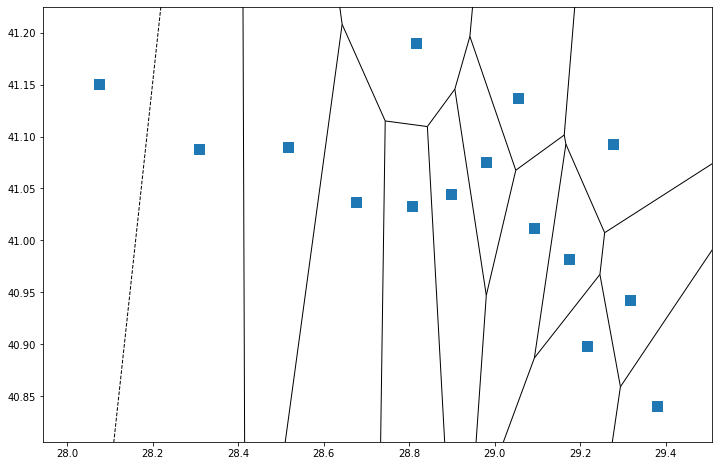

In [103]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig = plt.subplots(figsize=(12,8))

#Run kmeans clustering
X = data_morning[['LONGITUDE', 'LATITUDE']].values 
y = data_morning['NUMBER_OF_VEHICLES'].to_numpy()  
kmeans = KMeans(n_clusters=15, random_state=0).fit(X, sample_weight=y)
centers=kmeans.cluster_centers_

plt.scatter(centers[:,0],centers[:,1], marker='s', s=100)


vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca(),show_vertices=False)



In [104]:
X = data_morning[['LONGITUDE', 'LATITUDE']].to_numpy()
weights = data_morning['NUMBER_OF_VEHICLES'].to_numpy()
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=10)  
y_predict= kmeans.fit_predict(X,sample_weight=weights)  

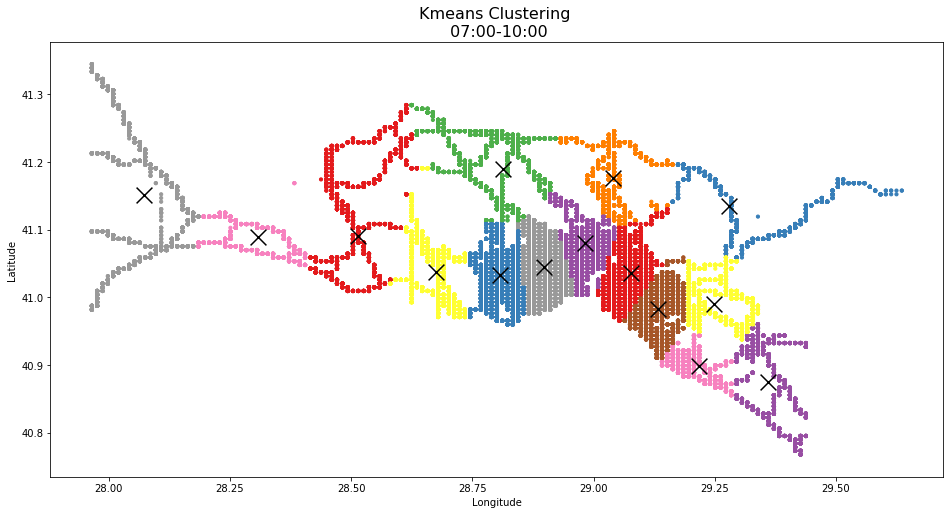

In [105]:
fig = plt.figure(figsize=(16,8))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1_r", s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n 07:00-10:00", fontsize=16)
plt.xlabel('Longitude')  
plt.ylabel('Latitude')
plt.show()

In [106]:
X = data_midday[['LONGITUDE', 'LATITUDE']].to_numpy()
weights = data_midday['NUMBER_OF_VEHICLES'].to_numpy()
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=10)  
y_predict= kmeans.fit_predict(X,sample_weight=weights)  

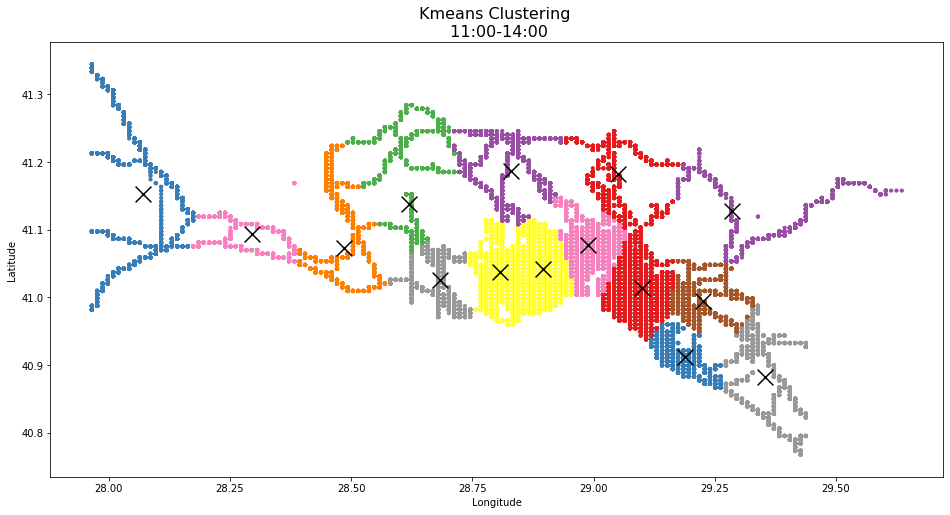

In [107]:
fig = plt.figure(figsize=(16,8))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1_r", s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n 11:00-14:00", fontsize=16)
plt.xlabel('Longitude')  
plt.ylabel('Latitude')
plt.show()

In [108]:
X = data_afternoon[['LONGITUDE', 'LATITUDE']].to_numpy()
weights = data_afternoon['NUMBER_OF_VEHICLES'].to_numpy()
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=10)  
y_predict= kmeans.fit_predict(X,sample_weight=weights)  

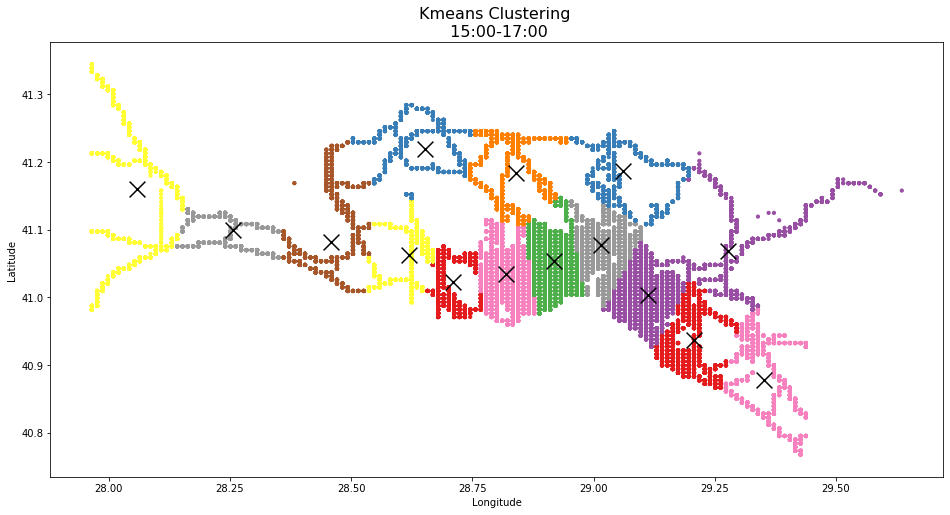

In [109]:
fig = plt.figure(figsize=(16,8))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1_r", s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n 15:00-17:00", fontsize=16)
plt.xlabel('Longitude')  
plt.ylabel('Latitude')
plt.show()

In [110]:
X = data_evening[['LONGITUDE', 'LATITUDE']].to_numpy()
weights = data_evening['NUMBER_OF_VEHICLES'].to_numpy()
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=10)  
y_predict= kmeans.fit_predict(X,sample_weight=weights)  

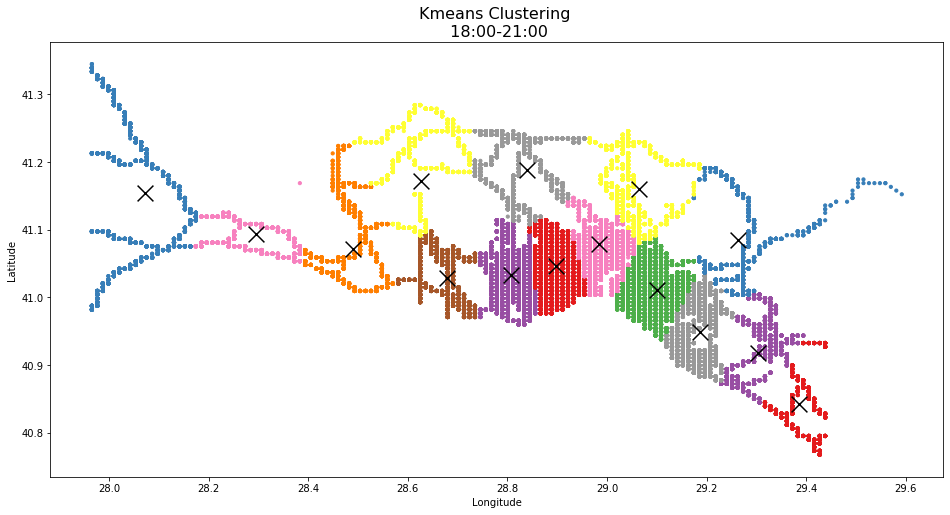

In [111]:
fig = plt.figure(figsize=(16,8))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1_r", s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n 18:00-21:00", fontsize=16)
plt.xlabel('Longitude')  
plt.ylabel('Latitude')
plt.show()

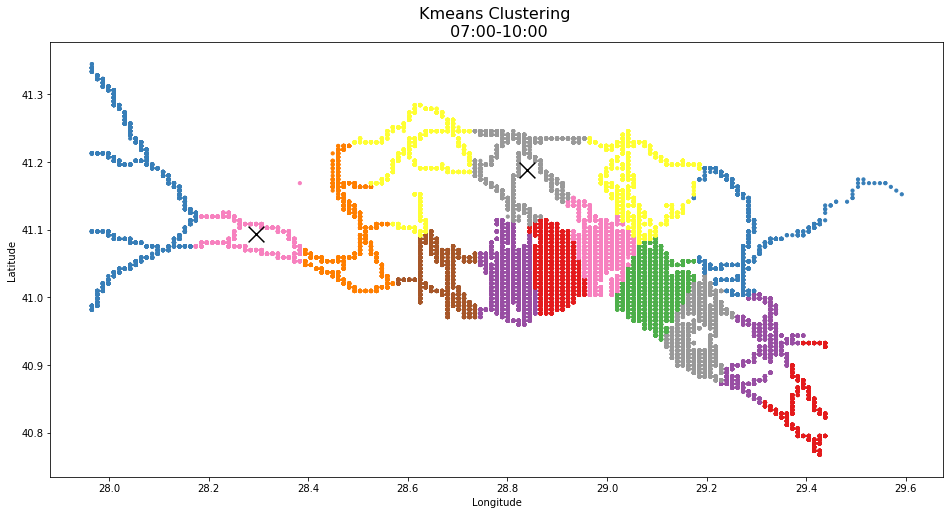

In [112]:
fig = plt.figure(figsize=(16,8))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1_r", s=10)
plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1], color='black', marker="x", s=250)
plt.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n 07:00-10:00", fontsize=16)
plt.xlabel('Longitude')  
plt.ylabel('Latitude')
plt.show()

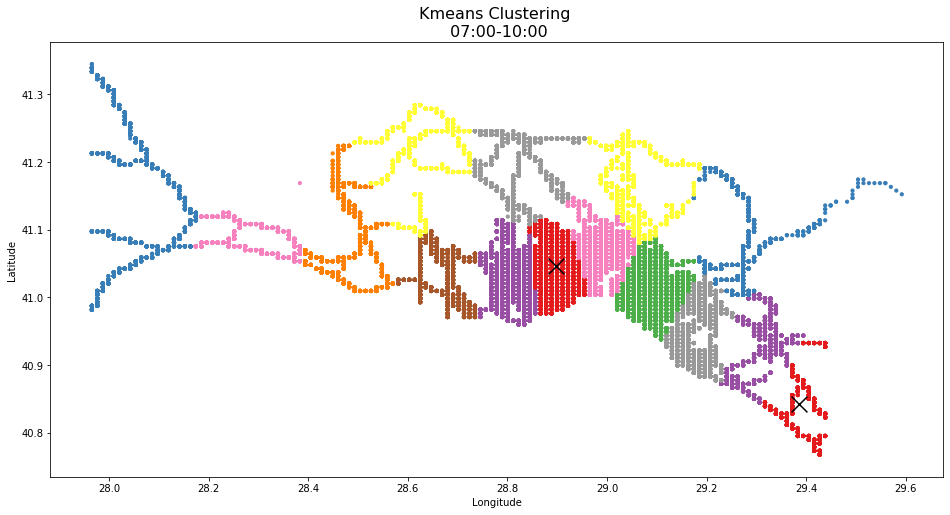

In [114]:
fig = plt.figure(figsize=(16,8))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1_r", s=10)
plt.scatter(kmeans.cluster_centers_[13,0],kmeans.cluster_centers_[13,1], color='black', marker="x", s=250)
plt.scatter(kmeans.cluster_centers_[14,0],kmeans.cluster_centers_[14,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n 07:00-10:00", fontsize=16)
plt.xlabel('Longitude')  
plt.ylabel('Latitude')
plt.show()

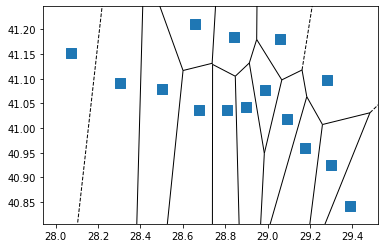

In [115]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

location1="XXX"

#Run kmeans clustering
X = data_midday[['LONGITUDE', 'LATITUDE']].values 
y = data_midday['NUMBER_OF_VEHICLES'].values   
kmeans = KMeans(n_clusters=15, random_state=0).fit(X, sample_weight=y)
centers=kmeans.cluster_centers_

plt.scatter(centers[:,0],centers[:,1], marker='s', s=100)


vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca(),show_vertices=False)



In [117]:
#Sadece belli koordinatlar arası kmeans yapılıyor.

X = data_midday[['LONGITUDE', 'LATITUDE']].to_numpy()
weights = data_midday['NUMBER_OF_VEHICLES'].to_numpy()
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=10)  
y_predict= kmeans.fit_predict(X,sample_weight=weights)  

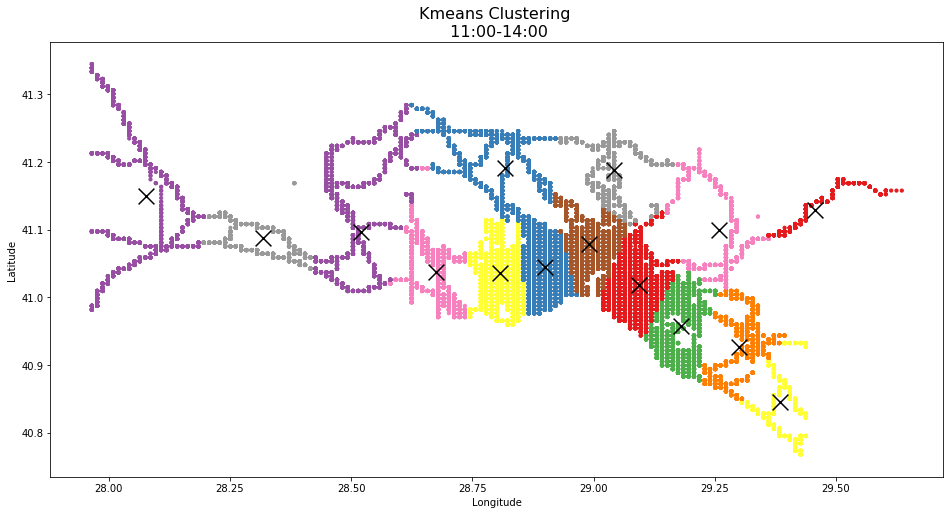

In [118]:
fig = plt.figure(figsize=(16,8))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1_r", s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n 11:00-14:00", fontsize=16)
plt.xlabel('Longitude')  
plt.ylabel('Latitude')
plt.show()

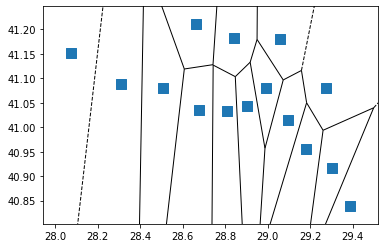

In [119]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

location1="XXX"

#Run kmeans clustering
X = data_afternoon[['LONGITUDE', 'LATITUDE']].values 
y = data_afternoon['NUMBER_OF_VEHICLES'].values   
kmeans = KMeans(n_clusters=15, random_state=0).fit(X, sample_weight=y)
centers=kmeans.cluster_centers_

plt.scatter(centers[:,0],centers[:,1], marker='s', s=100)


vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca(),show_vertices=False)



In [120]:
X = data_afternoon[['LONGITUDE', 'LATITUDE']].to_numpy()
weights = data_afternoon['NUMBER_OF_VEHICLES'].to_numpy()
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=10)  
y_predict= kmeans.fit_predict(X,sample_weight=weights)  

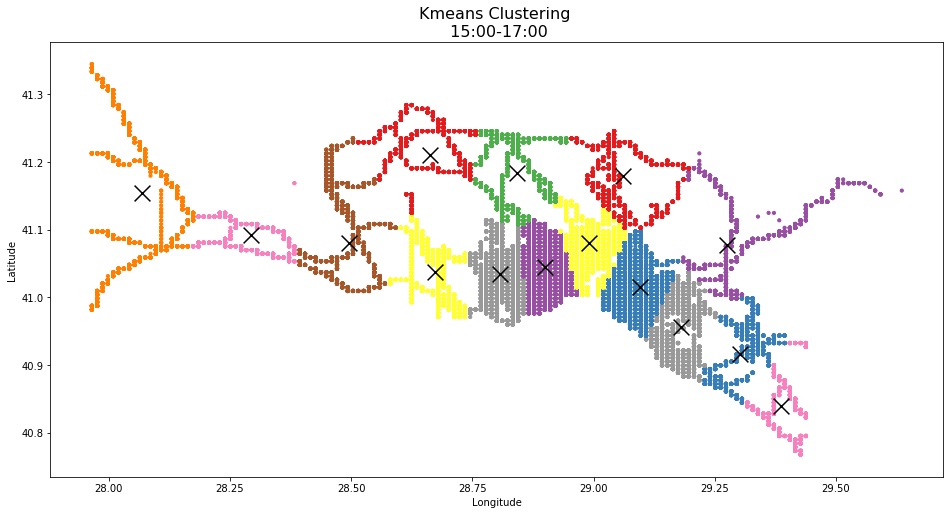

In [121]:
fig = plt.figure(figsize=(16,8))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1_r", s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n 15:00-17:00", fontsize=16)
plt.xlabel('Longitude')  
plt.ylabel('Latitude')
plt.show()

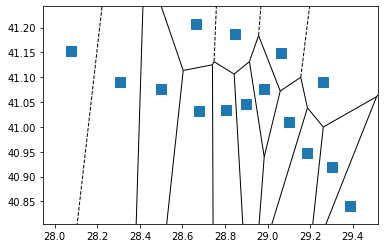

In [122]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

location1="XXX"

#Run kmeans clustering
X = data_evening[['LONGITUDE', 'LATITUDE']].values 
y = data_evening['NUMBER_OF_VEHICLES'].values   
kmeans = KMeans(n_clusters=15, random_state=0).fit(X, sample_weight=y)
centers=kmeans.cluster_centers_

plt.scatter(centers[:,0],centers[:,1], marker='s', s=100)

vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca(),show_vertices=False)



In [123]:
X = data_evening[['LONGITUDE', 'LATITUDE']].to_numpy()
weights = data_evening['NUMBER_OF_VEHICLES'].to_numpy()
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=10)  
y_predict= kmeans.fit_predict(X,sample_weight=weights)  

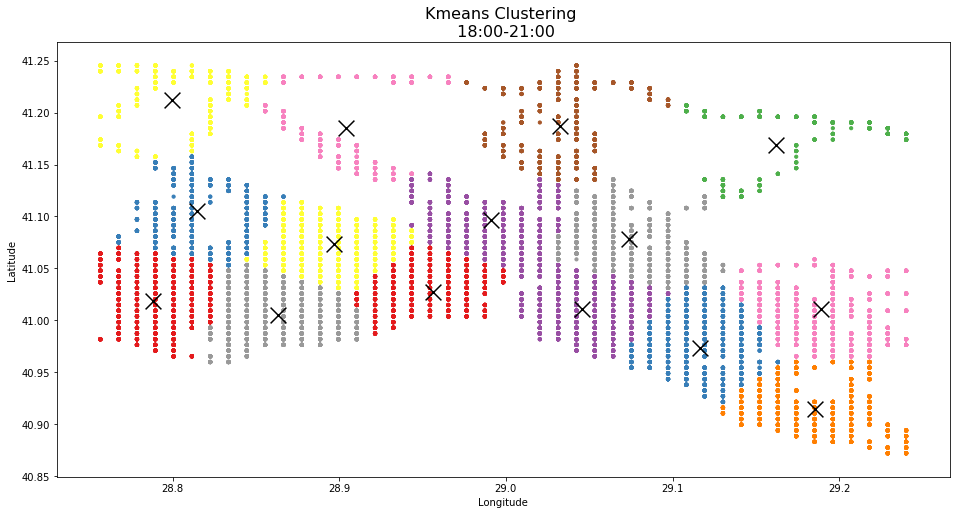

In [34]:
fig = plt.figure(figsize=(16,8))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1_r", s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n 18:00-21:00", fontsize=16)
plt.xlabel('Longitude')  
plt.ylabel('Latitude')
plt.show()

In [22]:
#data_morning verisinde oluşan clusterların merkezleri ve elips odak noktaları
len_data_morning = len(kmeans.cluster_centers_)

In [25]:
kmeans.cluster_centers_[1,0]

28.821055589966196

In [26]:
kmeans.cluster_centers_[1,1]

41.1838056594647

In [24]:
kmeans.cluster_centers_

array([[29.34607479, 40.89362427],
       [28.82105559, 41.18380566],
       [28.46562407, 41.09750081],
       [29.06800652, 41.02877611],
       [28.03135792, 41.24489544],
       [29.25573385, 41.0799226 ],
       [28.93817392, 41.061157  ],
       [28.65692375, 41.04071064],
       [28.02792299, 41.05215217],
       [28.20602181, 41.1038133 ],
       [29.05002972, 41.16607816],
       [28.81931568, 41.02710058],
       [29.17518195, 40.9536135 ],
       [28.63398378, 41.22208675],
       [29.45785826, 41.12900574]])

In [44]:
kmeans.cluster_centers_[0,1]

41.11723765110233

In [567]:
#Folium kütüphanesi ile haritalara belli bir koordinat verirsek mesela İstanbul haritasına ulaşabileceğiz.
!pip install folium

import folium

In [568]:
#İstanbul haritasını görürüz
harita = folium.Map(location=[41,29],
tiles="cartodbpositron",
width="%100",
height="%100",
zoom_start=10)

harita

In [928]:
points2 = [(41.173462,29.088163),(40.87471,29.236231)]
# 8 = 40.992752,29.023165
# 19 = 41.05099,29.05145
# 22 = 41.041084,29.007347
# 23 = 41.16637,29.05683
# 31 = 41.13449,29.091
# 2 = 40.973122,28.877699
# 3 = 41.003487,28.957884
# 13 = 41.16082,29.0462
# 28 = 40.88665,29.186825
# 4 = 41.0309,28.9525
# 12 = 41.121834,29.070221
# 25 = 40.979809,29.024643
# 5 = 41.0217,28.9767
# 1 = 40.972992,28.716211
# 7 = 41.04752,29.02554
# 20 = 41.0472,28.9375
# 26 = 40.918056,29.128611
# 6 = 41.03048,28.96622
# 9 = 41.044722,29.044444
# 18 = 41.07966,29.06541
# 32 = 41.173462,29.088163
# 10 = 41.06683,29.043409
# 29 = 40.87471,29.236231
# 16 = 41.10728,29.08024
# 30 = 40.814595,29.302454
# 11 = 41.10308742259623,29.056026935577393
# 27 = 41.010357,29.010363
# 14 = 41.18198,29.07499
# 15 = 41.13449,29.091
# 17 = 41.083202,29.066652
# 0 = 41.018234,28.577883
# 21 = 40.9522,29.0939
# 24 = 41.0338,28.9933
# 

In [929]:
for each in points2:  
    harita.add_child(folium.CircleMarker(location=each,
    fill='true',
    radius = 6,
    fill_color='blue',
    color = 'clear',
    fill_opacity=1))

In [930]:
folium.PolyLine(points2).add_to(harita)
harita

In [933]:
harita.save('seewegnetz.html')

In [586]:
points = []
for i in range(len(list(net2))):
               for j in range(len(list(net2[i,0]))):
                   points.append(list(net2[i,0])[j])

In [935]:
list(net2[1,0])

[(5, 0), (9, 0)]

In [587]:
points

[(2, 0),
 (19, 0),
 (5, 0),
 (9, 0),
 (0, 0),
 (8, 0),
 (19, 0),
 (22, 0),
 (23, 0),
 (31, 0),
 (13, 0),
 (23, 0),
 (28, 0),
 (12, 0),
 (13, 0),
 (25, 0),
 (1, 0),
 (7, 0),
 (20, 0),
 (26, 0),
 (9, 0),
 (18, 0),
 (32, 0),
 (5, 0),
 (10, 0),
 (26, 0),
 (29, 0),
 (2, 0),
 (1, 0),
 (6, 0),
 (16, 0),
 (22, 0),
 (28, 0),
 (7, 0),
 (19, 0),
 (26, 0),
 (29, 0),
 (30, 0),
 (27, 0),
 (4, 0),
 (16, 0),
 (19, 0),
 (3, 0),
 (4, 0),
 (14, 0),
 (18, 0),
 (20, 0),
 (26, 0),
 (13, 0),
 (28, 0),
 (29, 0),
 (32, 0),
 (9, 0),
 (12, 0),
 (20, 0),
 (25, 0),
 (28, 0),
 (6, 0),
 (13, 0),
 (0, 0),
 (2, 0),
 (10, 0),
 (12, 0),
 (5, 0),
 (13, 0),
 (16, 0),
 (21, 0),
 (28, 0),
 (32, 0),
 (20, 0),
 (2, 0),
 (9, 0),
 (2, 0),
 (3, 0),
 (27, 0),
 (4, 0),
 (17, 0),
 (5, 0),
 (7, 0),
 (10, 0),
 (13, 0),
 (11, 0),
 (24, 0),
 (3, 0),
 (9, 0),
 (14, 0),
 (17, 0),
 (20, 0),
 (31, 0),
 (7, 0),
 (10, 0),
 (14, 0),
 (32, 0),
 (10, 0),
 (2, 0),
 (28, 0),
 (6, 0),
 (15, 0),
 (20, 0),
 (29, 0)]

In [166]:
data_morning

,LONGITUDE,LATITUDE,NUMBER_OF_VEHICLES
11280,28.756714,41.064148,-6.819407
11381,28.756714,41.245422,-21.019283
11313,28.756714,41.174011,-18.989426
11168,28.756714,41.036682,-20.791209
11269,28.756714,41.064148,-12.113000
11351,28.756714,41.239929,-21.954385
11249,28.756714,41.058655,-4.153224
11228,28.756714,41.053162,-19.958739
11345,28.756714,41.195984,-20.517520
11198,28.756714,41.042175,-19.801368


In [169]:
#Sabah dataset

# create a LinearColorMap and assign colors, vmin, and vmax
# the colormap will show green for 0 density all the way up to red for 500 density
colormap = cmm.LinearColormap(colors=['green', 'yellow', 'orange', 'red'], vmin=-22, vmax=22)

#added tiny colourful circles one by one. 
for i in range(len(data_morning)):
    folium.Circle(
        location=[data_morning.iloc[i]['LATITUDE'], data_morning.iloc[i]['LONGITUDE']],
        radius=10,
        fill=True,
        color=colormap(data_morning.iloc[i]['NUMBER_OF_VEHICLES']),
        fill_opacity=0.2
    ).add_to(harita)
    
harita.add_child(colormap)

harita.save('density_data_morning_colormap.html')

In [33]:
#Belli boylamlar arasında clusterların harita üzerinde gösterimi.

# set color scheme for the clusters
x = np.arange(15)
ys = [i + x + (i * x) ** 2 for i in range(15)]
colors_array = cmm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [cmm.colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(data_morning['LATITUDE'], data_morning['LONGITUDE'], data_morning['Cluster Labels']):
    folium.CircleMarker(
        [lat, lon],
        radius = 3,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = rainbow[cluster - 1],
        fill_opacity = 0.7).add_to(harita)
       
harita.save('density_data_morning_clustered_filtered.html')

In [590]:
#İskele koordinatlarını bir dataframe içinde topluyoruz.
iskeleler = pd.DataFrame({
    'lat':[40.992752,41.083202,41.173462,41.06683,41.040556,41.034828,41.040300,41.07583,41.041084,41.116490,41.044722,40.9522,41.160820,41.050990,41.107280,41.0176,41.10308742259623,41.0472,41.0309,41.0398,41.113950,41.0338,41.074234,41.1002,41.0217,41.030480,41.036910,41.07966,41.04752,41.13449,41.18198,41.16637,41.0468,41.027683,41.003487,40.973122,41.016777,40.972992,41.018234,41.010357,40.918056,40.87471,40.88665,40.814595,41.121834,40.979809,40.995644],
    'lon':[29.023165,29.066652,29.088163,29.043409,28.944722,28.949203,29.005600,29.044,29.007347,29.093240,29.044444,29.0939,29.046200,29.051450,29.080240,28.9751,29.056026935577393,28.9375,28.9525,28.9497,29.059960,28.9933,29.058338,29.06548,28.9767,28.966220,29.029710,29.06541,29.02554,29.091,29.07499,29.05683,28.94104,29.015259,28.957884,28.877699,28.976494,28.716211,28.577883,29.010363,29.128611,29.236231,29.186825,29.302454,29.070221,29.024643,29.018513],
    'name':['Kadıköy','AnadoluHisarı','AnadoluKavağı','Arnavutköy','Ayvansaray', 'Balat','Barbaros Hayrettin Paşa','Bebek','Beşiktaş','Paşabahçe','Beylerbeyi','Bostancı','Büyükdere','Çengelköy','Çubuklu','Eminönü','Emirgan','Eyüp','Fener','Hasköy','İstinye','Kabataş','Kandilli','Kanlıca','Karaköy','Kasımpaşa','Kuzguncuk','Küçüksu','Ortaköy','Beykoz','Rumeli Kavağı','Sarıyer','Sütlüce','Üsküdar','Yenikapı','Bakırköy','Sirkeci','Avcılar','Büyükçekmece','Harem','Maltepe','Pendik','Kartal','Tuzla','Yeniköy','Moda','Haydarpaşa']
}, dtype=str)

iskeleler

,lat,lon,name
0,40.992752,29.023165,Kadıköy
1,41.083202,29.066652,AnadoluHisarı
2,41.173462,29.088163,AnadoluKavağı
3,41.06683,29.043409,Arnavutköy
4,41.040556,28.944722,Ayvansaray
5,41.034828,28.949203,Balat
6,41.0403,29.0056,Barbaros Hayrettin Paşa
7,41.07583,29.044,Bebek
8,41.041084,29.007347,Beşiktaş
9,41.11649,29.09324,Paşabahçe


In [365]:
#Elipsin her bir indisinde elipsin içinde kalan data_morning verisinin toplamları yazılacak
ellips = [0] * 47

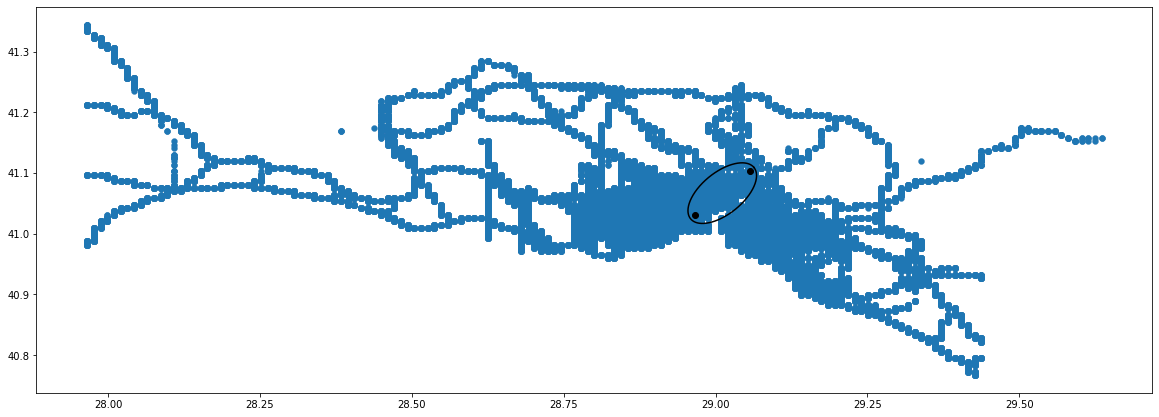

In [447]:
i = iskeleler[['lon', 'lat']].values
i = i.astype(float)
# Example focii and sum-distance
a1 = i[25][0]
b1 = i[25][1]
a2 = i[16][0]
b2 = i[16][1]

x0 = (a1 + a2) / 2                       # Center x-value
y0 = (b1 + b2) / 2                       # Center y-value

c = np.sqrt((a1 - x0)**2 + (b1 - y0)**2) # Distance from center to focus
e = 0.86



a = c / e
b = c * np.sqrt((1 / e**2)-1)
phi = np.arctan2((b2 - b1), (a2 - a1))   # Angle betw major axis and x-axis

# Parametric plot in t
resolution = 1000
t = np.linspace(0, 2*np.pi, resolution)
x = x0 + a * np.cos(t) * np.cos(phi) - b * np.sin(t) * np.sin(phi)
y = y0 + a * np.cos(t) * np.sin(phi) + b * np.sin(t) * np.cos(phi)

import matplotlib.patches as patches

fig,ax = plt.subplots(1,figsize=(20, 10))
ax.set_aspect('equal')

# Some test points
datax = X[:,0]
datay = X[:,1]



# checking the equation of
# ellipse with the given point
for i in range(len(X)):
    p = ((math.pow((X[i,0] - x0), 2) / math.pow(a, 2)) + 
    (math.pow((X[i,1] - y0), 2) / math.pow(b, 2)))
    if p < 1:
        ellips[31] += data_morning['NUMBER_OF_VEHICLES'][i]


# Plot ellipse
plt.plot(x, y, 'k')

# Show focii
plt.plot(a1, b1, 'ko')
plt.plot(a2, b2, 'ko')
ax.scatter(datax,datay,linewidths=0.3)

        
plt.savefig("mygraph.png")

In [448]:
ellips

[132868.43333333326,
 277000.6666666668,
 107798.41666666669,
 23242.18333333334,
 33461.533333333326,
 61489.11666666664,
 42907.70000000002,
 63354.44999999998,
 17466.866666666672,
 13593.499999999998,
 22127.866666666665,
 23087.966666666667,
 10006.55,
 9911.533333333336,
 3451.2,
 10121.249999999998,
 20659.716666666667,
 9306.516666666666,
 57320.3,
 79793.03333333333,
 24630.41666666668,
 7017.5666666666675,
 8116.200000000001,
 6896.883333333333,
 10609.166666666666,
 16220.966666666662,
 4495.033333333332,
 7185.449999999999,
 885178.1500000019,
 230127.7500000002,
 274904.38333333354,
 279859.4000000001,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [71]:
# add circles of piers one by one on the map
for i in range(0,len(iskeleler)):
   folium.Circle(
      location=[iskeleler.iloc[i]['lat'], iskeleler.iloc[i]['lon']],
      popup=iskeleler.iloc[i]['name'],
      radius=1000,  #meter
      color='#69b3a2',
      fill=True,
      fill_color='#69b3a2',
      fill_opacity=0.2
   ).add_to(harita)


# Show the map again
harita

In [76]:
#ÇALIŞTIRMADIM 

#calculated distance between piers and densities
distance_matrix = haversine_distances(
    iskeleler[['lat', 'lon']],
    data[['LATITUDE', 'LONGITUDE']]
)

In [77]:
distance_matrix = distance_matrix * 6371  #multiply by Earth radius to get kilometers

In [80]:
#1km'den küçük olan uzaklıkları(daire içinde olanları) burada topluyorum ve result denen bir array'e koyuyorum.

mLessThan1 = distance_matrix < 1000
#print(mLessThan1[46,:])
#print(mLessThan1.shape)
# Sum elements <1 across rows
result = np.sum(distance_matrix*mLessThan1, axis=1)
#print(result.shape)
print(result)

#result arrayi artık iskelelerin etrafındaki circle'daki yoğunlukların toplamını verir

#find max value
max = np.max(result)
print(max)

#elements of result divided by max
normalized_data = np.divide(result,max)

[1.89673584e+08 1.76277030e+08 1.07488859e+08 1.76422331e+08
 1.98628431e+08 1.96964376e+08 1.89630124e+08 1.80262907e+08
 1.89789537e+08 1.71299997e+08 1.78491556e+08 1.42396432e+08
 1.31521979e+08 1.73750869e+08 1.72191044e+08 2.00192919e+08
 1.75097086e+08 1.97892430e+08 1.97326789e+08 1.98045049e+08
 1.69749854e+08 1.92261862e+08 1.76974346e+08 1.73627921e+08
 1.99372460e+08 1.96918622e+08 1.83065309e+08 1.77043835e+08
 1.81297844e+08 1.51625816e+08 1.01768599e+08 1.20955952e+08
 1.97229440e+08 1.89071681e+08 1.93362916e+08 1.46756738e+08
 2.00278209e+08 9.66126314e+07 6.03659560e+07 1.92960328e+08
 1.21733764e+08 1.06917519e+08 1.10615763e+08 6.36994954e+07
 1.66000876e+08 1.88317699e+08 1.91626194e+08]
200278208.50040805


In [81]:
#elements of normalized_data is between 0 and 1
print(normalized_data)

[0.94705053 0.88016081 0.53669772 0.8808863  0.99176257 0.98345385
 0.94683353 0.90006251 0.94762949 0.85531021 0.89121806 0.71099314
 0.6566964  0.86754755 0.85975926 0.99957415 0.87426929 0.98808768
 0.9852634  0.98884971 0.84757027 0.95997395 0.88364254 0.86693366
 0.99547755 0.9832254  0.91405506 0.88398951 0.90523001 0.75707596
 0.50813616 0.60393965 0.98477734 0.9440452  0.96547157 0.73276438
 1.         0.48239213 0.30141051 0.96346142 0.60782331 0.53384499
 0.55231053 0.31805505 0.82885141 0.94028053 0.95680002]


In [85]:
colormap = cmm.LinearColormap(colors=['green', 'yellow', 'orange', 'red'], vmin=0, vmax=1)

# add colorful circles of piers one by one on the map according to normalized_data
for i in range(0,len(iskeleler)):
   folium.Circle(
      location=[iskeleler.iloc[i]['lat'], iskeleler.iloc[i]['lon']],
      popup=iskeleler.iloc[i]['name'],
      radius=1000,  #meter
      color='#69b3a2',
      fill=True,
      fill_color=colormap(normalized_data[i]),
      fill_opacity=0.2
   ).add_to(harita)

harita.add_child(colormap)

# Show the map again
harita